<a href="https://colab.research.google.com/github/Janhavi-1/Open-Closed-Eyes-Detection/blob/main/Eyes_Open_closed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing

In [1]:

import cv2, os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense

# 2. Data Preparation and Augmentation

In [27]:

# Paths to images
open_eyes_dir = '/content/dataset/open_eyes'
closed_eyes_dir = '/content/dataset/closed_eyes'

# Paths to save augmented images
augmented_open_dir = '/content/augmented_data/open_eyes'
augmented_closed_dir = '/content/augmented_data/closed_eyes'

os.makedirs(augmented_open_dir, exist_ok=True)
os.makedirs(augmented_closed_dir, exist_ok=True)

# Image Data Generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(source_dir, target_dir, target_count):
    # Iterated over image files directly in the source directory
    for img_name in os.listdir(source_dir):
        img_path = os.path.join(source_dir, img_name)
        # Checked if it's a file and not a directory
        if os.path.isfile(img_path):
            img = load_img(img_path)  # Load image
            x = img_to_array(img)  # Convert image to array
            x = np.expand_dims(x, axis=0)  # Expand dimensions to fit the model
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=target_dir, save_prefix='aug', save_format='jpeg'):
                i += 1
                # Assuming we want to generate 'target_count' images in total
                if i >= target_count:
                    break

# Augment open eyes images to 600
augment_images(open_eyes_dir, augmented_open_dir, 600)

# Augment closed eyes images to 600
augment_images(closed_eyes_dir, augmented_closed_dir, 600)

print("Data augmentation complete.")

Data augmentation complete.


To Download augmented dataset As a zip file

In [33]:

import shutil
from google.colab import files

augmented_data_path = '/path/to/augmented/dataset'

zip_file_path = '/content/augmented_dataset.zip'

shutil.make_archive('/content/augmented_dataset', 'zip', augmented_data_path)

files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Model Training
Once the data is augmented, we can use it to train your model.

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Add validation split
)

train_generator = train_datagen.flow_from_directory(
    '/content/augmented_data',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training'  # Specify training subset
)

# Generator for validation data
validation_generator = train_datagen.flow_from_directory(
    '/content/augmented_data',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'  # Specify validation subset
)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trained the model, including validation data
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=30,
    validation_data=validation_generator,  # Pass validation generator
    validation_steps=5  # Number of steps for validation (adjust as needed)
)


Found 15986 images belonging to 2 classes.
Found 3996 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4785 - loss: 0.7424 - val_accuracy: 0.5800 - val_loss: 0.6521
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7205 - loss: 0.5360 - val_accuracy: 0.8300 - val_loss: 0.3713
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8360 - loss: 0.3354 - val_accuracy: 0.8700 - val_loss: 0.3756
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8884 - loss: 0.2814 - val_accuracy: 0.9200 - val_loss: 0.2372
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9068 - loss: 0.2214 - val_accuracy: 0.9000 - val_loss: 0.1807
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9415 - loss: 0.1418 - val_accuracy: 0.8700 - val_loss: 0.2264
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9369 - loss: 0.1501 - val_accuracy: 0.8800 - val_loss: 0.2727
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9321 - loss: 0.1458 - val_accuracy: 0.9200 - val_loss: 0.1860
Epo

# 4. Evaluation
Evaluate the model on random images from the dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


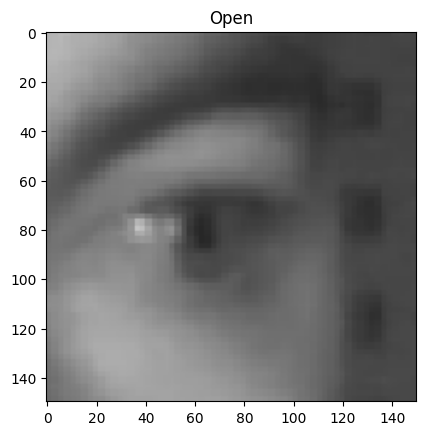

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


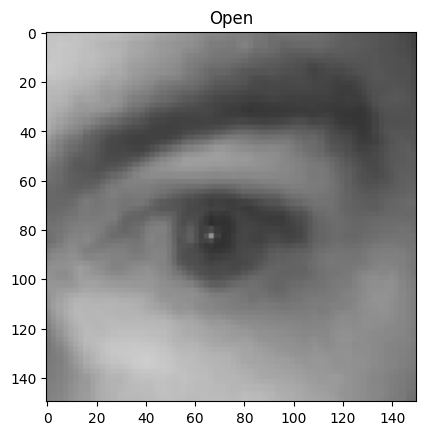

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


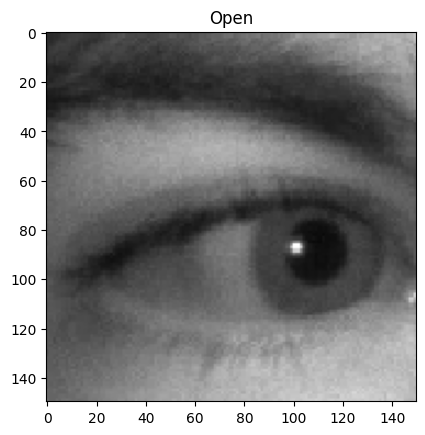

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


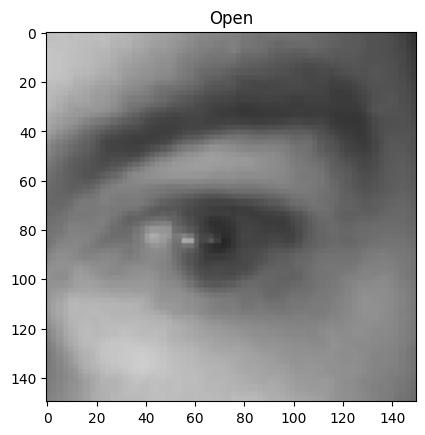

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


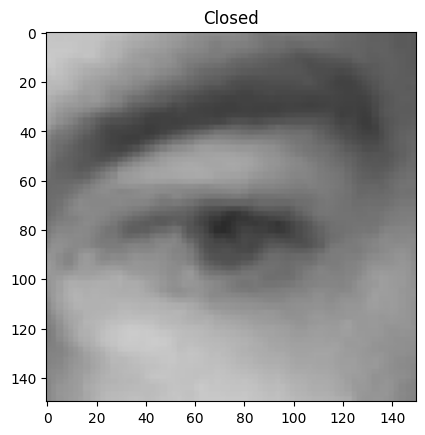

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


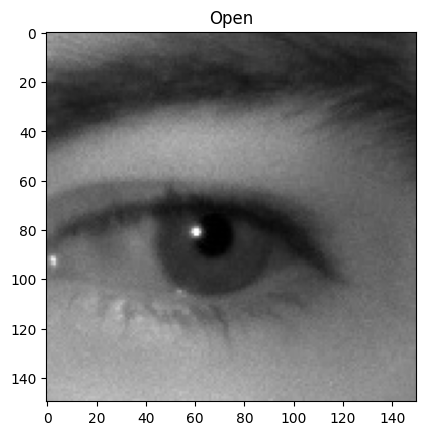

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


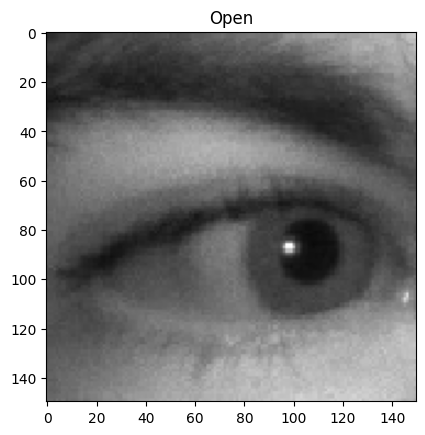

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


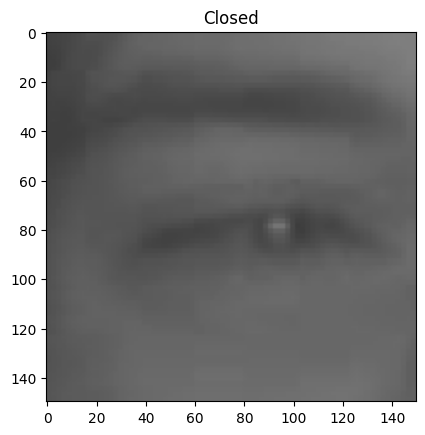

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


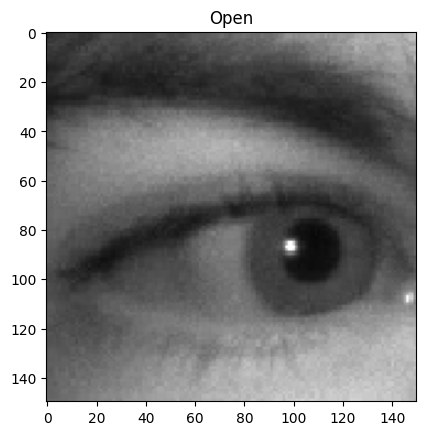

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


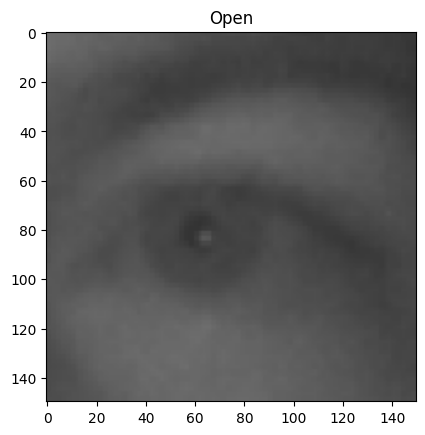

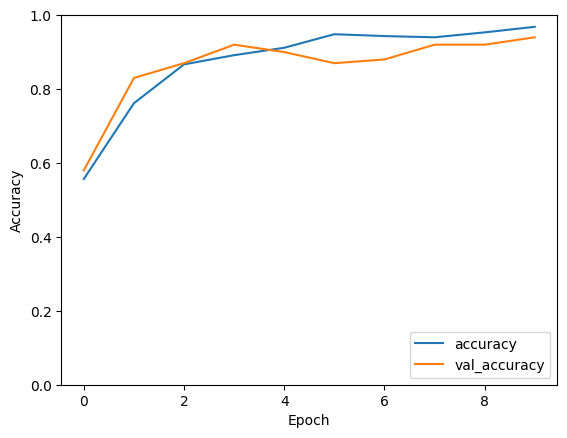

In [31]:
import random
import matplotlib.pyplot as plt

# Load model
model = tf.keras.models.load_model('eye_open_closed_model.h5')

# Load 5 random images of open eyes
for _ in range(10):
    img_path = random.choice(os.listdir('/content/dataset/open_eyes'))
    img = load_img(os.path.join('/content/dataset/open_eyes', img_path), target_size=(150, 150))
    img_array = img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    plt.imshow(img)
    plt.title('Open' if prediction > 0.5 else 'Closed')
    plt.show()

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Requirements
Created a requirements.txt file to list dependencies.

In [17]:
!pip freeze > requirements.txt